<a href="https://colab.research.google.com/github/gvincenzi/colab/blob/master/image_classification_MPL_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [75]:
(train_images,train_labels), (test_images,test_labels) = cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
# Queste due linee sono per fare i one-hot vector e per poter usare la CategoricalCrossentropy
# train_labels=tf.keras.utils.to_categorical(train_labels)
# test_labels=tf.keras.utils.to_categorical(test_labels)

train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

In [76]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'];

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [77]:
def plot_image(i,images,label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images[i])
  plt.xlabel(class_names[label])

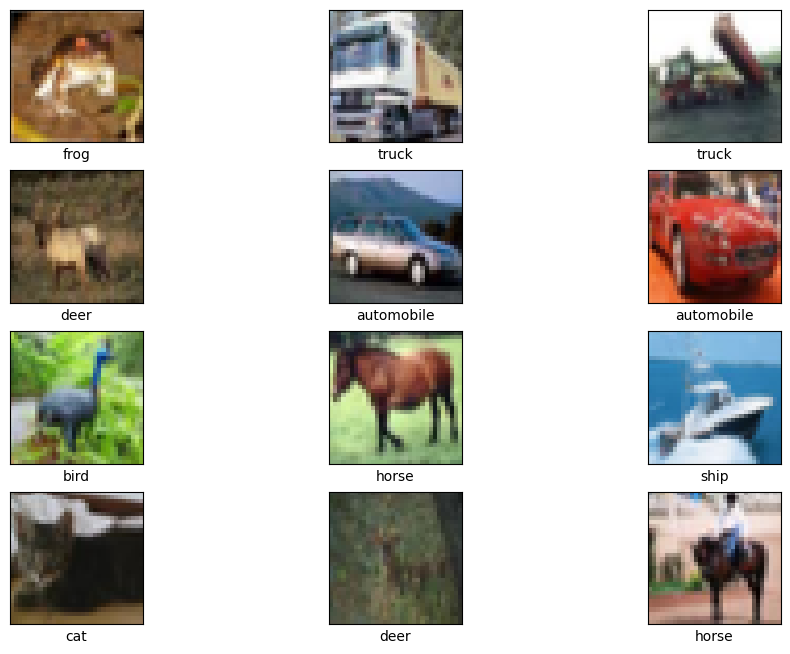

In [78]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,train_images,train_labels[i])

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2722 - loss: 2.0587 - val_accuracy: 0.3663 - val_loss: 1.7837
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3703 - loss: 1.7701 - val_accuracy: 0.3795 - val_loss: 1.7477
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3925 - loss: 1.7075 - val_accuracy: 0.3825 - val_loss: 1.7493
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4069 - loss: 1.6766 - val_accuracy: 0.4046 - val_loss: 1.6724
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4182 - loss: 1.6451 - val_accuracy: 0.4150 - val_loss: 1.6736
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4226 - loss: 1.6243 - val_accuracy: 0.4105 - val_loss: 1.6642
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4342 - loss: 1.5902 - val_accuracy: 0.4239 - val_loss: 1.6417
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4326 - loss: 1.5794 - val_accuracy: 0.4203 - 

In [83]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3979 - loss: 1.7115


[1.719772458076477, 0.40049999952316284]

In [84]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [85]:
def plot_image_with_prediction(i,images,label,predicted_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images[i])
  if predicted_label == label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[label]),
                                color=color)

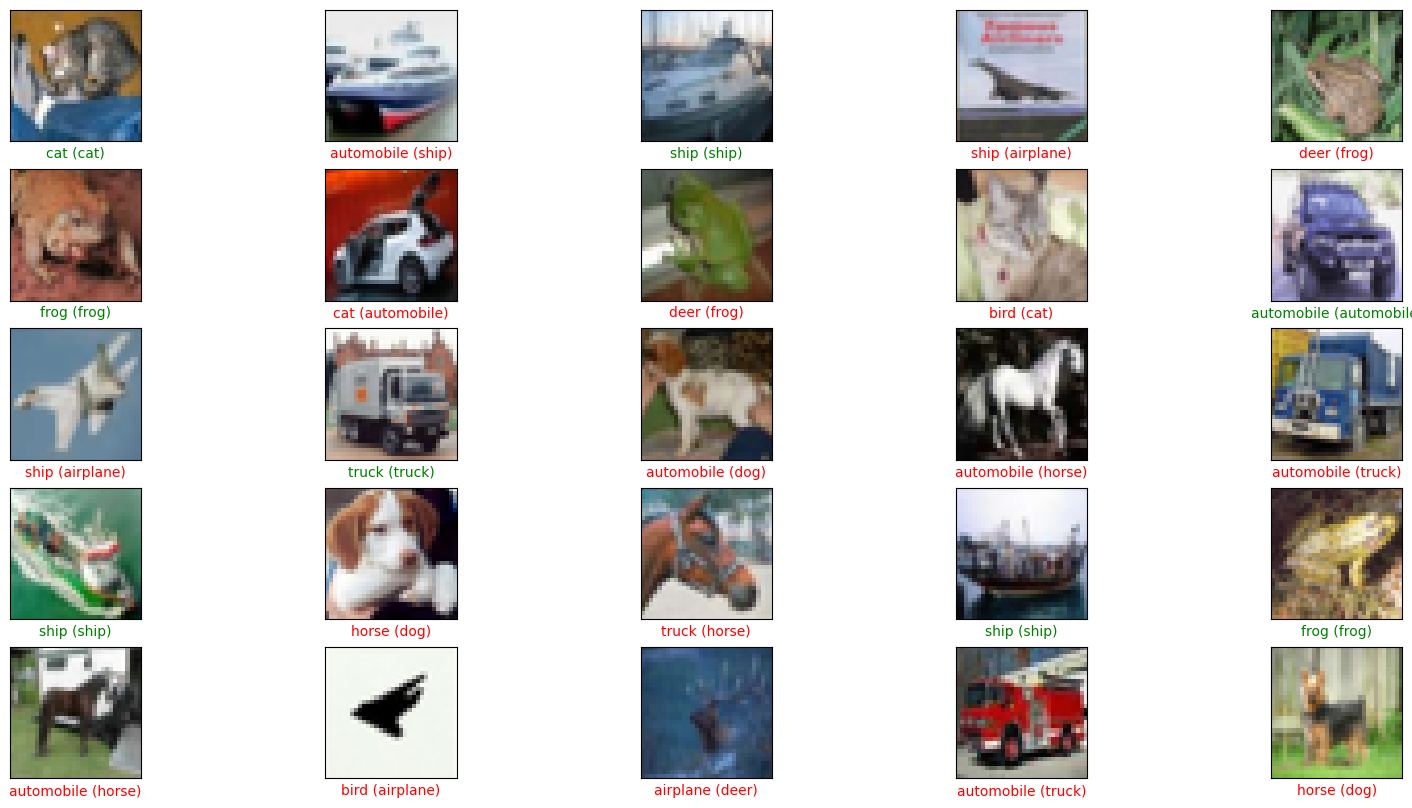

In [86]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image_with_prediction(i,test_images,test_labels[i],np.argmax(predictions[i]))

In [90]:
model_cnn = tf.keras.Sequential([
    layers.Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [93]:
model_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 253ms/step - accuracy: 0.2920 - loss: 1.9022 - val_accuracy: 0.4856 - val_loss: 1.4079
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 247ms/step - accuracy: 0.5106 - loss: 1.3587 - val_accuracy: 0.5597 - val_loss: 1.2441
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 249ms/step - accuracy: 0.5810 - loss: 1.1783 - val_accuracy: 0.5770 - val_loss: 1.1927
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 248ms/step - accuracy: 0.6218 - loss: 1.0768 - val_accuracy: 0.6204 - val_loss: 1.0925
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 247ms/step - accuracy: 0.6526 - loss: 0.9948 - val_accuracy: 0.6256 - val_loss: 1.0735
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 246ms/step - accuracy: 0.6677 - loss: 0.9437 - val_accuracy: 0.6577 - val_loss: 0.9856
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 244ms/step - accuracy: 0.6924 - loss: 0.8756 - val_accuracy: 0.6510 - val_loss: 1.0148
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 241ms/step - accuracy: 0.7022 - loss: 0.85

In [94]:
model_cnn.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6911 - loss: 0.9069


[0.9123371243476868, 0.6909000277519226]

In [95]:
predictions_cnn = model_cnn.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step


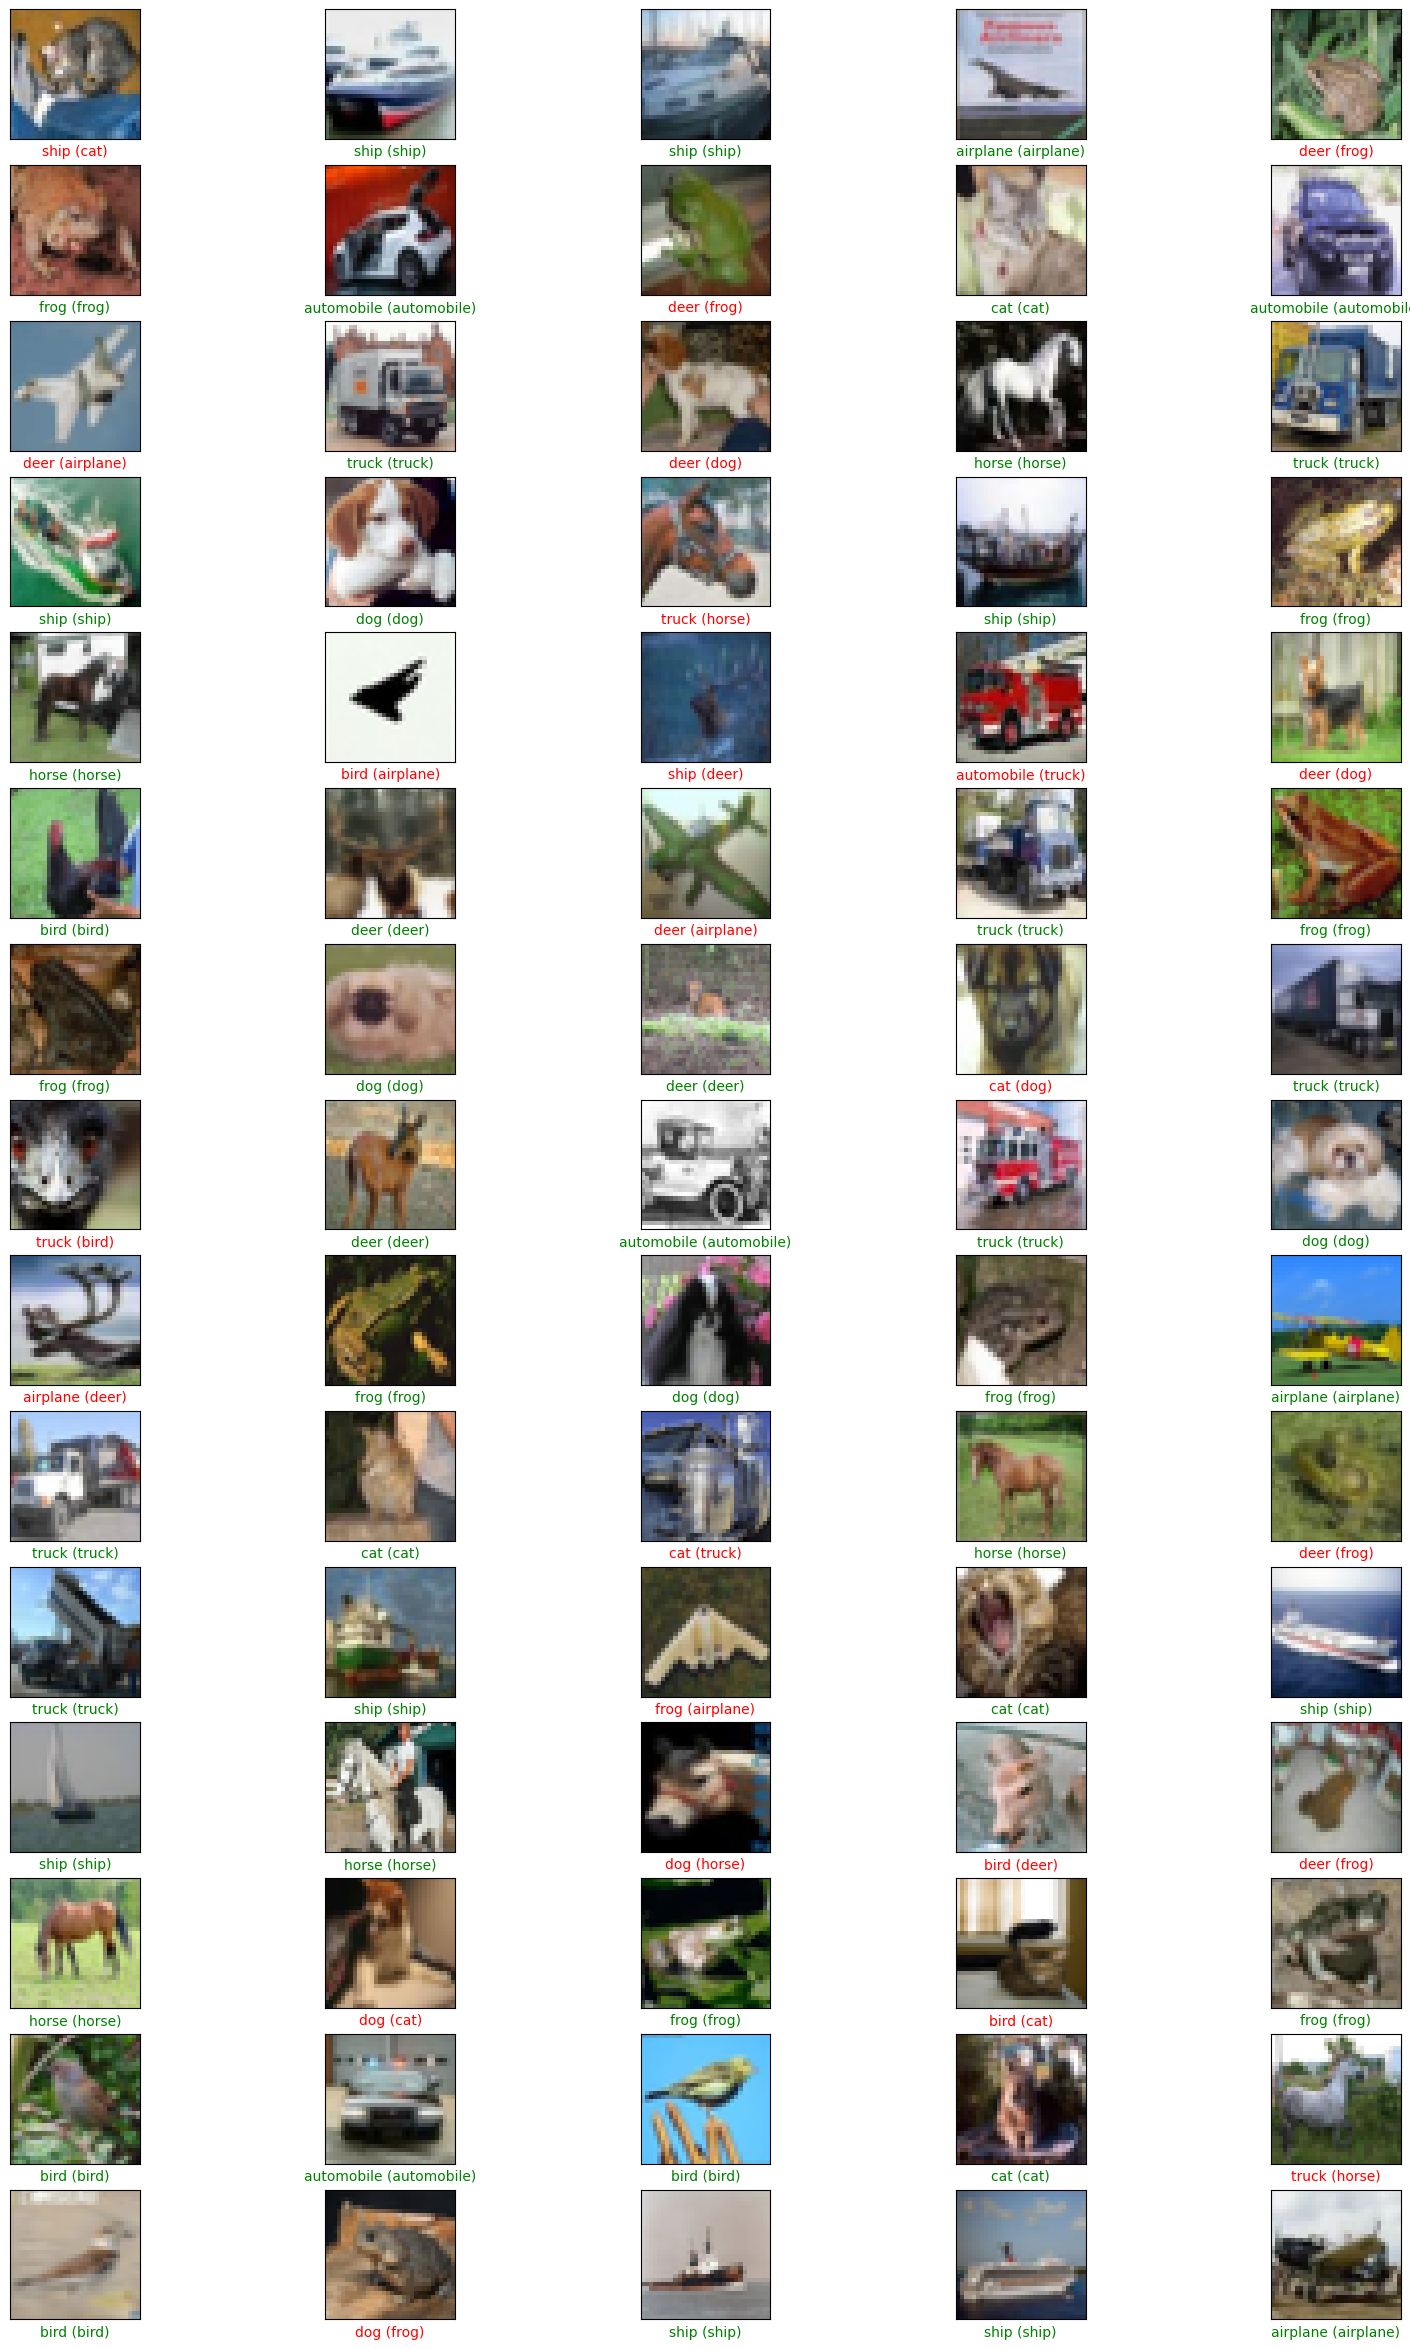

In [97]:
num_rows = 15
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image_with_prediction(i,test_images,test_labels[i],np.argmax(predictions_cnn[i]))